## Street network analysis when a street is a node

Yongha Hwang

In some traditions of street network research, street becomes a node. The edges are connected when these streets touch each other. In OSMnx, basically, the intersections of streets become nodes and streets become edges. Therefore, in order to build a network according to the previous tradition, you have to modify the network that OSMnx generates properly. Fortunately, NetworkX has line_graph() function that does exactly that operation. This example demonstrates the process of transforming a city's street network into a line graph using OSMnx and calculating and coloring the closeness centrality for this line graph.

### Create a street network using OSMnx

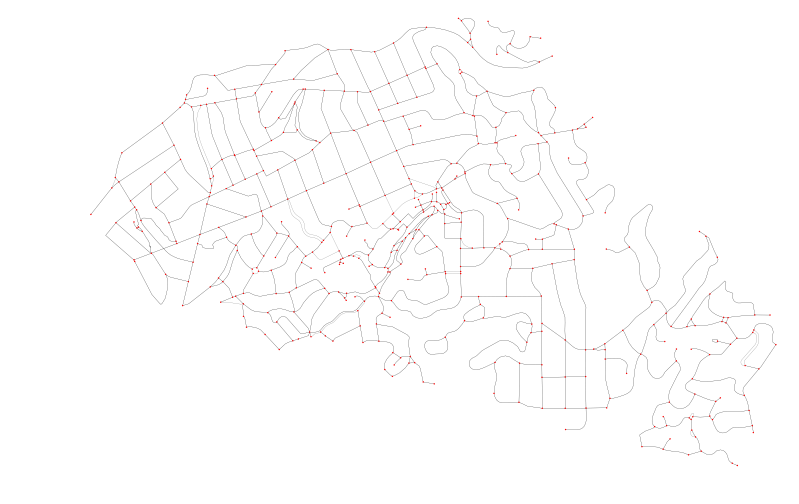

In [1]:
import osmnx as ox, networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np, matplotlib as mpl
%matplotlib inline
G = ox.graph_from_place('Piedmont, California, USA')
G_projected = ox.project_graph(G)

# Nodes in this network are street junctions. 
fig, ax = ox.plot_graph(G_projected, node_size=1, node_color='r', node_zorder=2, 
                        edge_color='k', edge_linewidth=0.1, edge_alpha=0.8)

### Let's convert the graph into a line graph so that the streets become nodes in the new graph.

In [2]:
# NetworkX's line_graph() creates a line graph.
L=nx.line_graph(G_projected)

# Calculate closeness of each street from the line graph.
closeness = nx.closeness_centrality(L)

### We are going to color streets in the original graph with their closeness centralities.

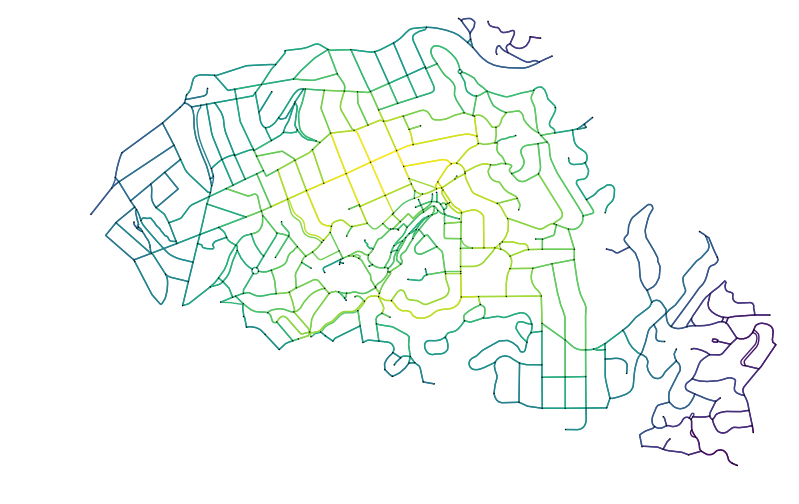

In [3]:
# list of edge values for the orginal graph
ev = [closeness[edge + (0,)] for edge in G_projected.edges()]

# color scale. viridis is chosen here.
norm = mpl.colors.Normalize(vmin=min(ev), vmax=max(ev))
m = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

# list of colors for edges in the original graph 
ecol= [m.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G_projected, node_size=1, node_color="#000000", node_zorder=2,
                        edge_color=ecol, edge_linewidth=1, edge_alpha=1)